In [1]:
import os
import sys
from os.path import join as pjoin
import numpy as np

import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.ndimage import gaussian_filter

/scratch/users/austin.zane/conda/envs/ucsf_env/lib/python3.12/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [2]:
data_dir = '/scratch/users/austin.zane/ucsf_fast/data/pilot_labeling/AnnotationData/MorisonPouchMasks_1-23'
sys.path.append('/accounts/campus/austin.zane/ucsf_fast')
from common.datasets import FASTDataset
from experiments.train import visualize_segmentation_overlay

In [3]:
custom_dataset = FASTDataset(data_dir=data_dir)
dataloader = DataLoader(custom_dataset, batch_size=2, shuffle=True)

In [6]:
for images, labels in dataloader:
    print(images.shape, labels.shape)
    train_img = images
    train_label = labels
    break

torch.Size([2, 1, 720, 960]) torch.Size([2, 1, 720, 960])


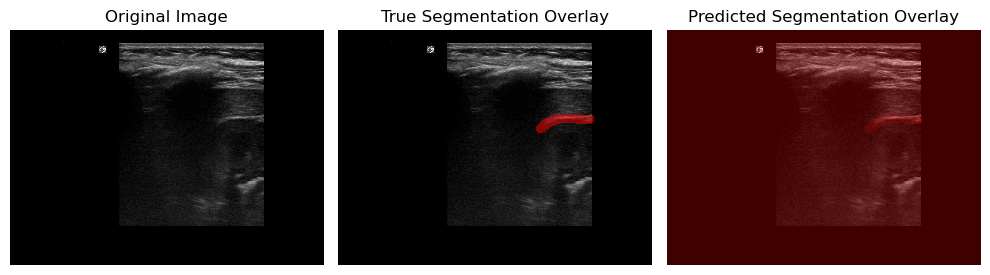

In [20]:
ex_image = train_img[1]
ex_label = train_label[1]

visualize_segmentation_overlay(ex_image, mask_tensor_true=ex_label,mask_tensor_pred=ex_label, alpha=0.5)

## Create a 3D image

### Attempt 1: matplotlib

(720, 960)


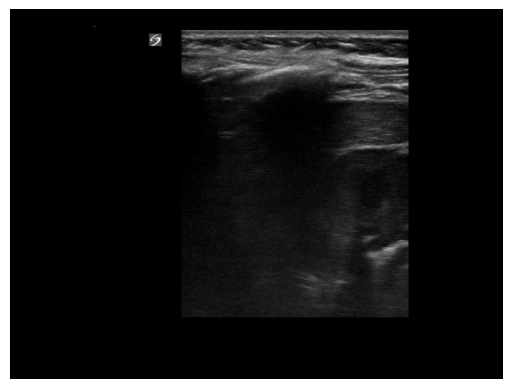

In [7]:
img = np.squeeze(np.array(train_img[1]))
print(img.shape)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

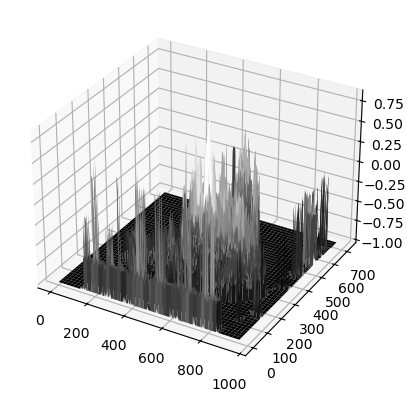

In [10]:
# Create a meshgrid
x = np.arange(0, img.shape[1])
y = np.arange(0, img.shape[0])
x, y = np.meshgrid(x,y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# Use the pixel values as the z-axis values
z = np.flipud(img)

# Plot the surface
ax.plot_surface(x, y, z, cmap='gray')

plt.show()

### Attempt 2: PyVista

In [11]:
import pyvista as pv

In [ ]:
# Create a mesh grid
x = np.arange(0, img.shape[1])
y = np.arange(0, img.shape[0])
x, y = np.meshgrid(x, y)

# We need to flatten the arrays for PyVista and scale z to enhance visualization if needed
z = img.flatten()  # This can be scaled/normalized as needed

# Create a point cloud with the x, y, z coordinates
points = np.vstack((x.ravel(), y.ravel(), z)).T

# Create a PyVista grid from the points
# Note: For large datasets, consider using `pv.PolyData(points)` directly.
grid = pv.PolyData(points)
grid["Elevation"] = z  # Add elevation data (or pixel intensity) as a point attribute

# Automatically create a surface from the point cloud using Delaunay 2D
surface = grid.delaunay_2d()

# Plot the surface
plotter = pv.Plotter()
plotter.add_mesh(surface, scalars='Elevation', cmap='gray')
plotter.enable_eye_dome_lighting()  # Enhances depth perception
plotter.show()

/scratch/users/austin.zane/conda/envs/ucsf_env/lib/python3.12/site-packages/pyvista/plotting/plotter.py:151: UserWarning: 
This system does not appear to be running an xserver.
PyVista will likely segfault when rendering.

Try starting a virtual frame buffer with xvfb, or using
  ``pyvista.start_xvfb()``

  warnings.warn(
/scratch/users/austin.zane/conda/envs/ucsf_env/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(
ERROR:root:bad X server connection. DISPLAY=
2024-03-04 14:40:34.685 (  49.333s) [        33AFA740]vtkXOpenGLRenderWindow.:464    ERR| vtkXOpenGLRenderWindow (0x5593f716f3f0): bad X server connection. DISPLAY=


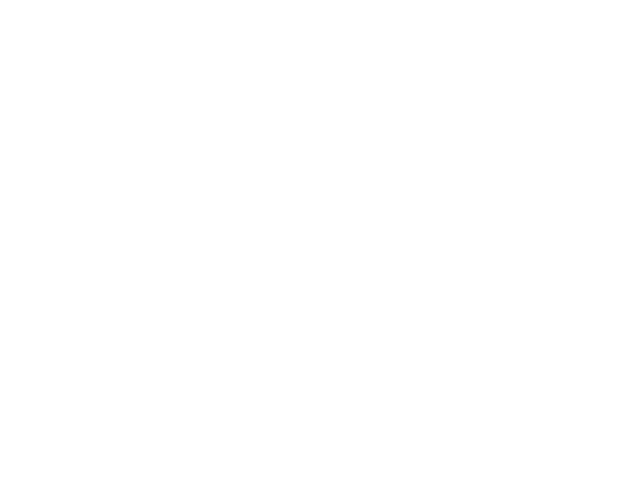

In [2]:
%matplotlib widget
 
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
 
# creating random dataset
xs = [14, 24, 43, 47, 54, 66, 74, 89, 12,
      44, 1, 2, 3, 4, 5, 9, 8, 7, 6, 5]
 
ys = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 6, 3,
      5, 2, 4, 1, 8, 7, 0, 5]
 
zs = [9, 6, 3, 5, 2, 4, 1, 8, 7, 0, 1, 2, 
      3, 4, 5, 6, 7, 8, 9, 0]
 
# creating figure
fig = plt.figure()
ax = Axes3D(fig)
 
# creating the plot
plot_geeks = ax.scatter(xs, ys, zs, color='green')
 
# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
 
# displaying the plot
plt.show()

In [23]:
img = np.squeeze(np.array(train_img[1]))
img = gaussian_filter(img, sigma=1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

# Function to plot 3D
def plot_image_3d(img, angle=30):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create x, y, and z coordinates
    x = np.arange(img.shape[1])
    y = np.arange(img.shape[0])
    x, y = np.meshgrid(x, y)
    z = img

    # Plot the surface
    ax.plot_surface(x, y, z, cmap='gray', edgecolor='none')

    # Set viewing angle
    ax.view_init(70, angle)
    
    # Labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensity')
    
    plt.show()

# Create an interactive widget
#widget = interactive(plot_image_3d, angle=(0, 360, 10))
#display(widget)
plot_image_3d(img, 30)

NameError: name 'train_img' is not defined

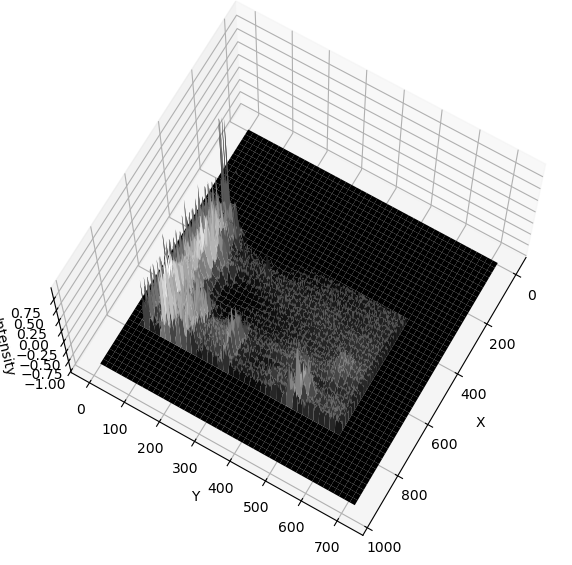

In [22]:
plot_image_3d(img, 30)

# Visualize a fixed set of images

## First, we plot a grid of 2D images to manual pick which to visualize in 3D

In [163]:
import os
import sys
from os.path import join as pjoin
from yaml import safe_load
import numpy as np
import importlib

import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt

/scratch/users/austin.zane/conda/envs/ucsf_env/lib/python3.12/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [164]:
data_dir = '/scratch/users/austin.zane/ucsf_fast/data/pilot_labeling/AnnotationData/MorisonPouchMasks_1-23'

img_files = [f for f in os.listdir(data_dir) if (not '_Morison' in f and not '.db' in f and not '.json' in f)]
img_array = []
label_array = []

for img_name in img_files:
    label_name = img_name.rsplit('.', 1)[0] + '_Morison.png'
    
    img_path = os.path.join(data_dir, img_name)
    label_path = os.path.join(data_dir, label_name)
    
    image = Image.open(img_path).convert('L')
    
    if not os.path.exists(label_path):
        print(f'For image {img_name}, the label {label_name} does not exist')
        continue
    label = Image.open(label_path).convert('L')
    
    img_array.append(image)
    label_array.append(label)
    
print(len(img_array))
print(len(img_files))

384
384


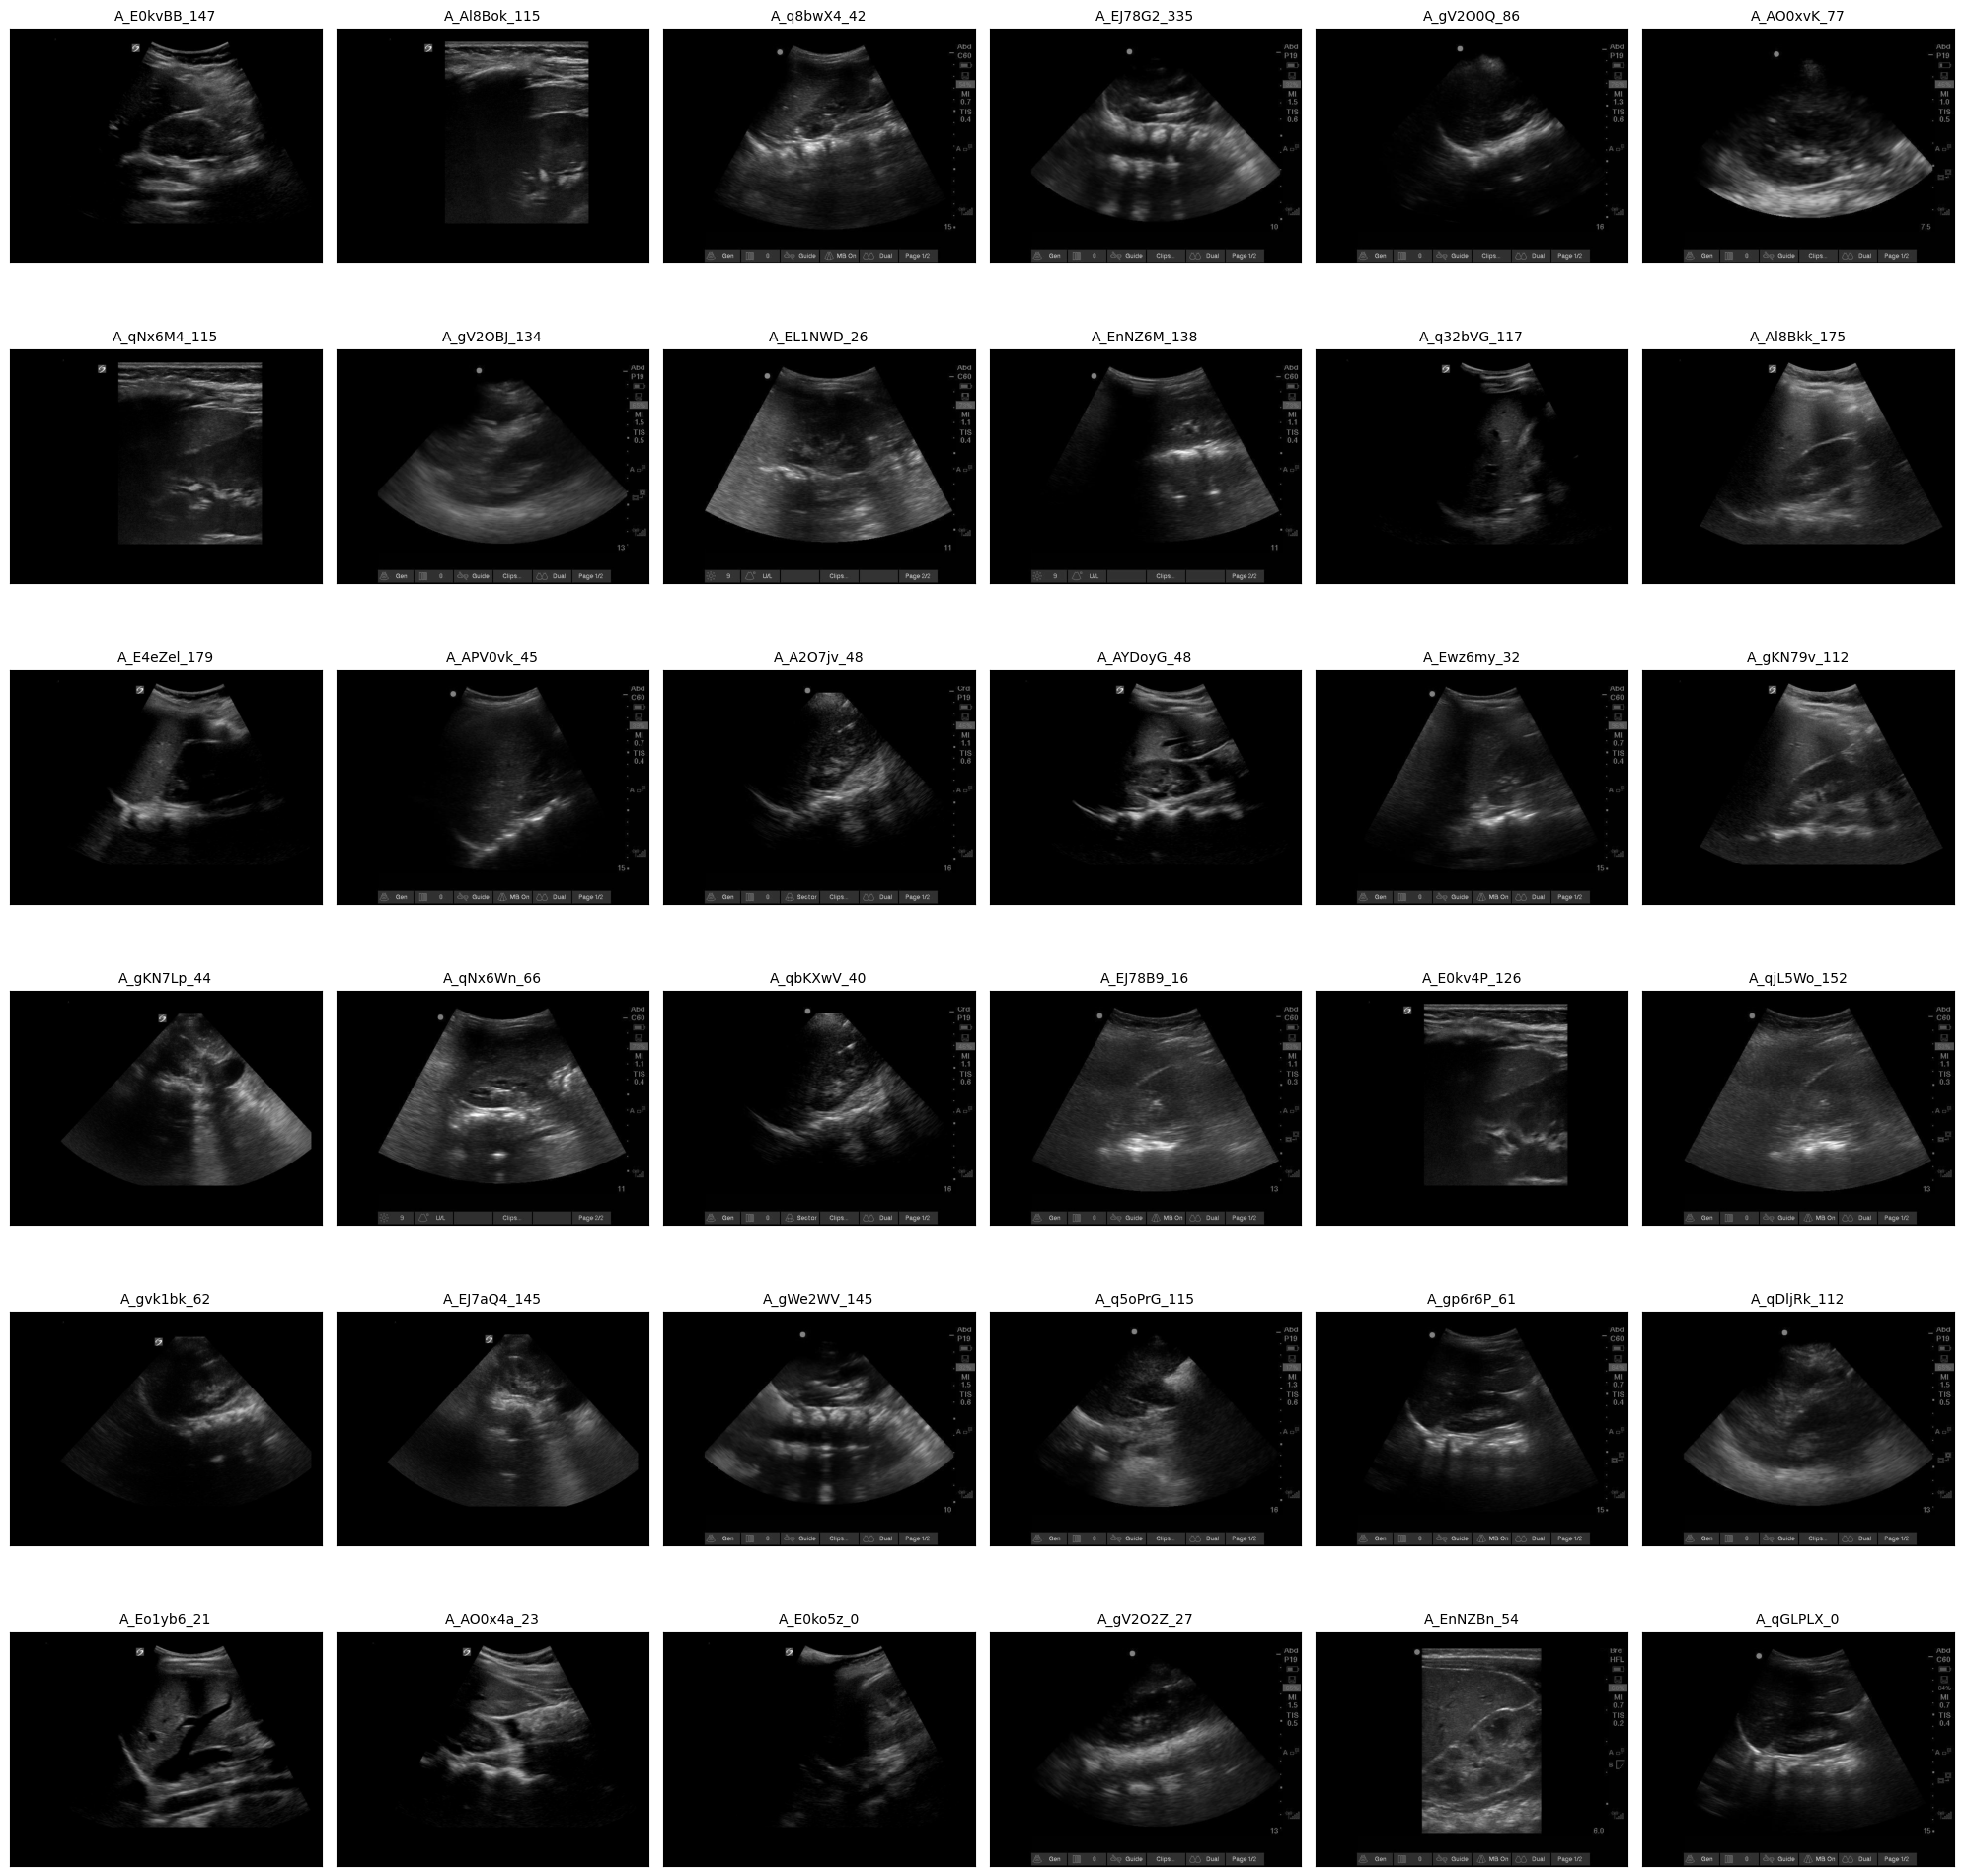

In [168]:
start_index = 300

# Define the grid size you want to display at once
grid_size = 6  # for a 4x4 grid
fig, axes = plt.subplots(grid_size, grid_size, figsize=(20, 20))

for i, ax in enumerate(axes.flat):
    
    current_index = start_index + i
    
    # Break the loop if you've reached the end of img_array or the current grid limit
    if current_index >= len(img_array):
        break
    
    # Display the image
    ax.imshow(img_array[current_index], cmap='gray')
    
    # Get the image name without the directory path and extension for display
    img_name = img_files[current_index].rsplit('/', 1)[-1].split('.')[0]
    ax.set_title(img_name, fontsize=10)
    
    # Hide the axes ticks
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust layout to make room for the image names
plt.tight_layout()
plt.show()


## 3D plots of selected images

In [1]:
import os
import sys
from os.path import join as pjoin
import numpy as np
import importlib

from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # This import registers the 3D projection, but is otherwise unused.

In [2]:
sel_img_names = ['A_gkvDkD_90', 
                 'A_EL1N1D_77', 
                 'A_qGLY01_142', 
                 'A_Ewz6Kp_49', 
                 'A_q1zDQV_144']
sel_img_files = [s + '.png' for s in sel_img_names]


data_dir = '/scratch/users/austin.zane/ucsf_fast/data/pilot_labeling/AnnotationData/MorisonPouchMasks_1-23'
fig_dir = '/scratch/users/austin.zane/ucsf_fast/figures/view_3D'

img_files = [f for f in os.listdir(data_dir) if (not '_Morison' in f and not '.db' in f and not '.json' in f)]
sel_img_array = []
sel_label_array = []

for img_name in sel_img_files:
    label_name = img_name.rsplit('.', 1)[0] + '_Morison.png'
    
    img_path = os.path.join(data_dir, img_name)
    label_path = os.path.join(data_dir, label_name)
    
    image = Image.open(img_path).convert('L')
    
    if not os.path.exists(label_path):
        print(f'For image {img_name}, the label {label_name} does not exist')
        continue
    label = Image.open(label_path).convert('L')
    
    sel_img_array.append(image)
    sel_label_array.append(label)
    

In [11]:
def truncate_and_scale(image):
    # Calculate the 97.5th percentile value
    percentile_975 = np.percentile(image, 99.9)
    
    # Truncate pixel values above the 97.5th percentile
    truncated_image = np.clip(image, None, percentile_975)
    
    # Scale the pixel values to [0, 255]
    scaled_image = (truncated_image / percentile_975) * 255
    
    #return truncated_image.astype(np.uint8)
    return scaled_image.astype(np.uint8)


def add_red_mask(original_image, mask, opacity):
    # Ensure the mask has the same shape as the original image
    assert original_image.shape == mask.shape, "Original image and mask must have the same shape"

    # Convert the original grayscale image to RGB
    colored_image = np.dstack((original_image, original_image, original_image))

    # Create a red color array with the same shape as the original image
    red_color = np.zeros_like(colored_image)
    red_color[..., 0] = 255  # Set the red channel to 255

    # Apply the mask to the red color array
    red_color_masked = np.where(mask[..., np.newaxis] == 255, red_color, colored_image)

    # Blend the original image with the red color using the specified opacity
    colored_image = np.where(mask[..., np.newaxis] == 255,
                              (1 - opacity) * colored_image + opacity * red_color_masked,
                              colored_image)

    # Ensure the resulting image has valid pixel values (0-255)
    colored_image = np.clip(colored_image, 0, 255).astype(np.uint8)

    return colored_image
    
    
def plot_image_3d_with_mask(img, mask, angle1=70, angle2=30, xlim=None, ylim=None, zlim=None, plot_mask=True, ax=None):
    img = np.array(img)
    mask = np.array(mask)

    # Ensure the mask is binary (0 or 1), and normalize the mask if it's used
    if plot_mask:
        mask_binary = np.where(mask > 0, 1, 0)  # Convert mask to binary: 1 where mask > 0, else 0
    else:
        mask_binary = np.zeros_like(img)  # If not plotting mask, create a dummy mask of zeros

    if ax is None:
        ax = plt.gca()

    # Create x, y coordinates
    x = np.arange(img.shape[1])
    y = np.arange(img.shape[0])
    x, y = np.meshgrid(x, y)

    z = img  # Using the original image for height values

    # Normalize img values to be between 0 and 1 for coloring
    normalized_img = img / 255.0  # Assuming the max intensity value is 255

    # Create an RGBA colors array initialized based on the image grayscale values
    colors = np.zeros((img.shape[0], img.shape[1], 4))
    colors[..., :3] = normalized_img[..., None]  # Set RGB to the normalized image (grayscale)
    colors[..., 3] = 1  # Full opacity

    # Apply red color to masked areas if plot_mask is True
    if plot_mask:
        colors[mask_binary == 1, :] = [1, 0, 0, 1]  # Red for mask areas

    # Plot the surface with facecolors
    ax.plot_surface(x, y, z, facecolors=colors, edgecolor='none')

    # Set viewing angle
    ax.view_init(angle1, angle2)

    # Optionally set the axes limits
    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)
    if zlim is not None:
        ax.set_zlim(zlim)

    # Labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensity')
    
    
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def plot_image_3d_with_mask(img, mask, angle1=70, angle2=30, xlim=None, ylim=None, zlim=None, plot_mask=True, ax=None):
    img = np.array(img)
    mask = np.array(mask)
    
    # Ensure the mask is binary (0 or 1), and normalize the mask if it's used
    if plot_mask:
        mask_binary = np.where(mask > 0, 1, 0) # Convert mask to binary: 1 where mask > 0, else 0
    else:
        mask_binary = np.zeros_like(img) # If not plotting mask, create a dummy mask of zeros
    
    if ax is None:
        ax = plt.gca()
    
    # Create x, y coordinates
    x = np.arange(img.shape[1])
    y = np.arange(img.shape[0])
    x, y = np.meshgrid(x, y)
    
    z = img # Using the original image for height values
    
    # Normalize img values to be between 0 and 1 for coloring
    normalized_img = img / 255.0 # Assuming the max intensity value is 255
    
    # Create a custom colormap that transitions from deep blue to neon yellow
    cmap_colors = ['#00008B', '#FFFF00']  # Deep blue and neon yellow
    cmap = LinearSegmentedColormap.from_list('deep_blue_neon_yellow', cmap_colors)
    
    # Map the normalized image values to colors using the custom colormap
    colors = cmap(normalized_img)
    
    # Apply red color to masked areas if plot_mask is True
    if plot_mask:
        colors[mask_binary == 1, :] = [1, 0, 0, 1] # Red for mask areas
    
    # Plot the surface with facecolors
    ax.plot_surface(x, y, z, facecolors=colors, edgecolor='none')
    
    # Set viewing angle
    ax.view_init(angle1, angle2)
    
    # Optionally set the axes limits
    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)
    if zlim is not None:
        ax.set_zlim(zlim)
    
    # Labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensity')

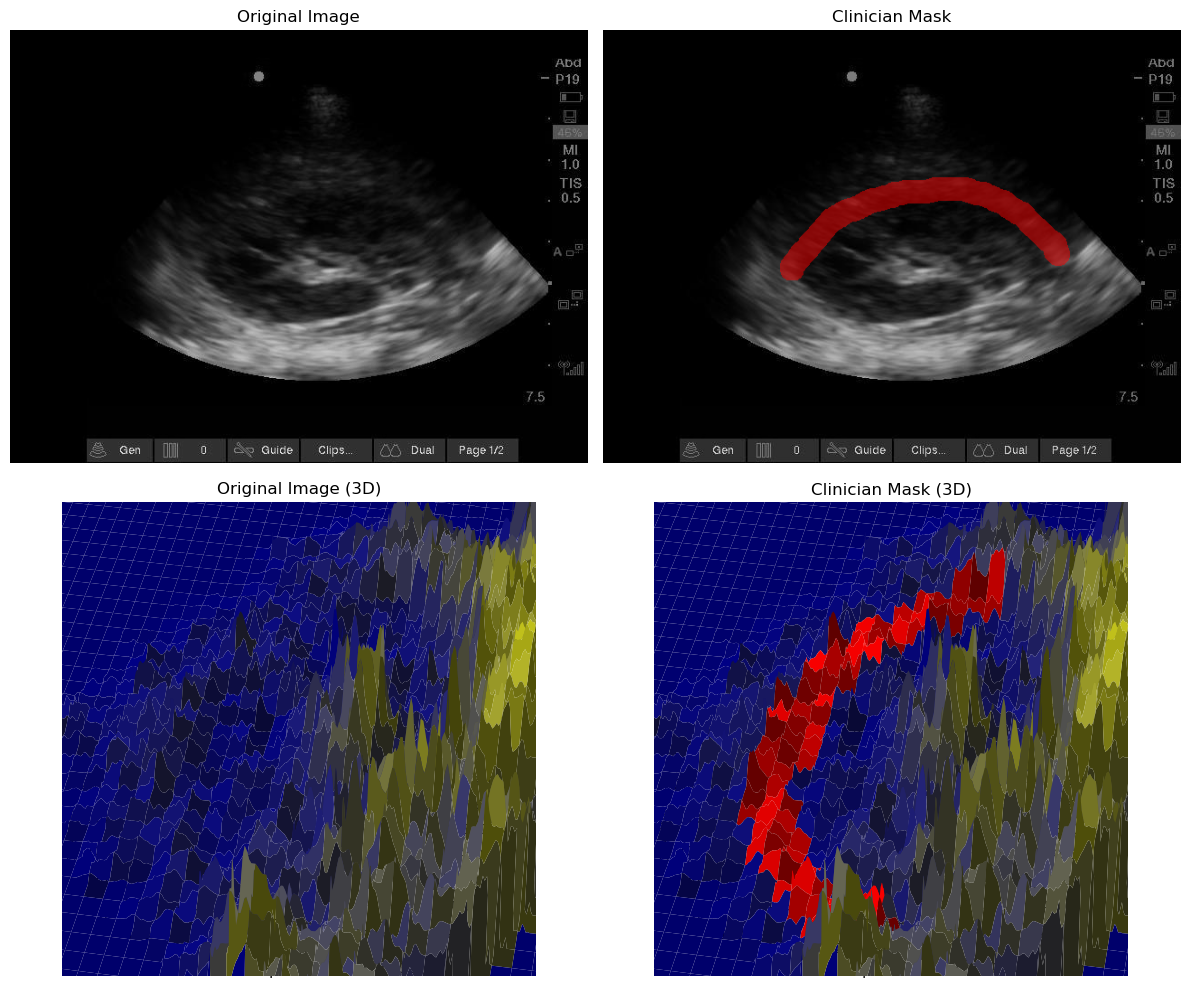

<Figure size 640x480 with 0 Axes>

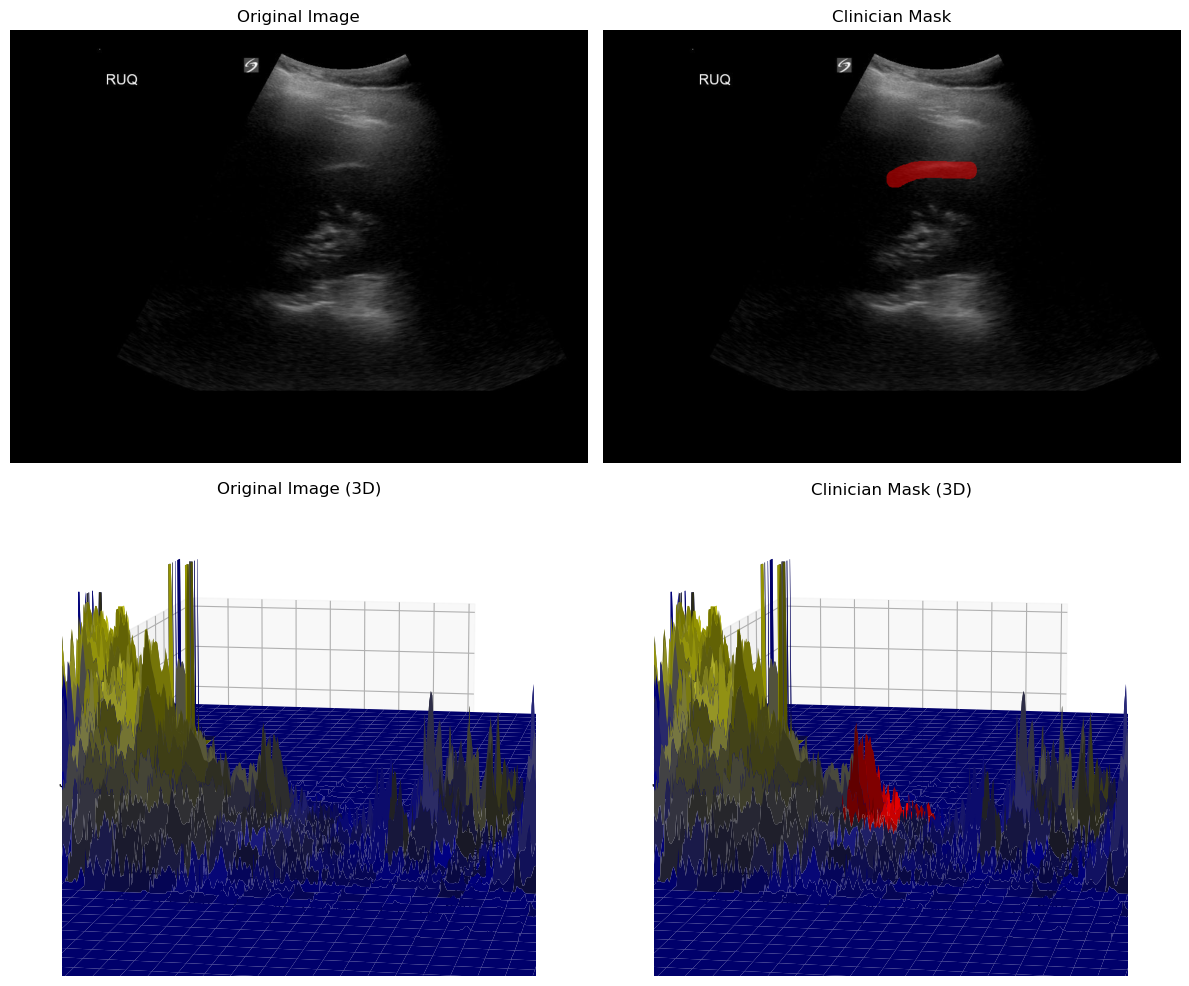

<Figure size 640x480 with 0 Axes>

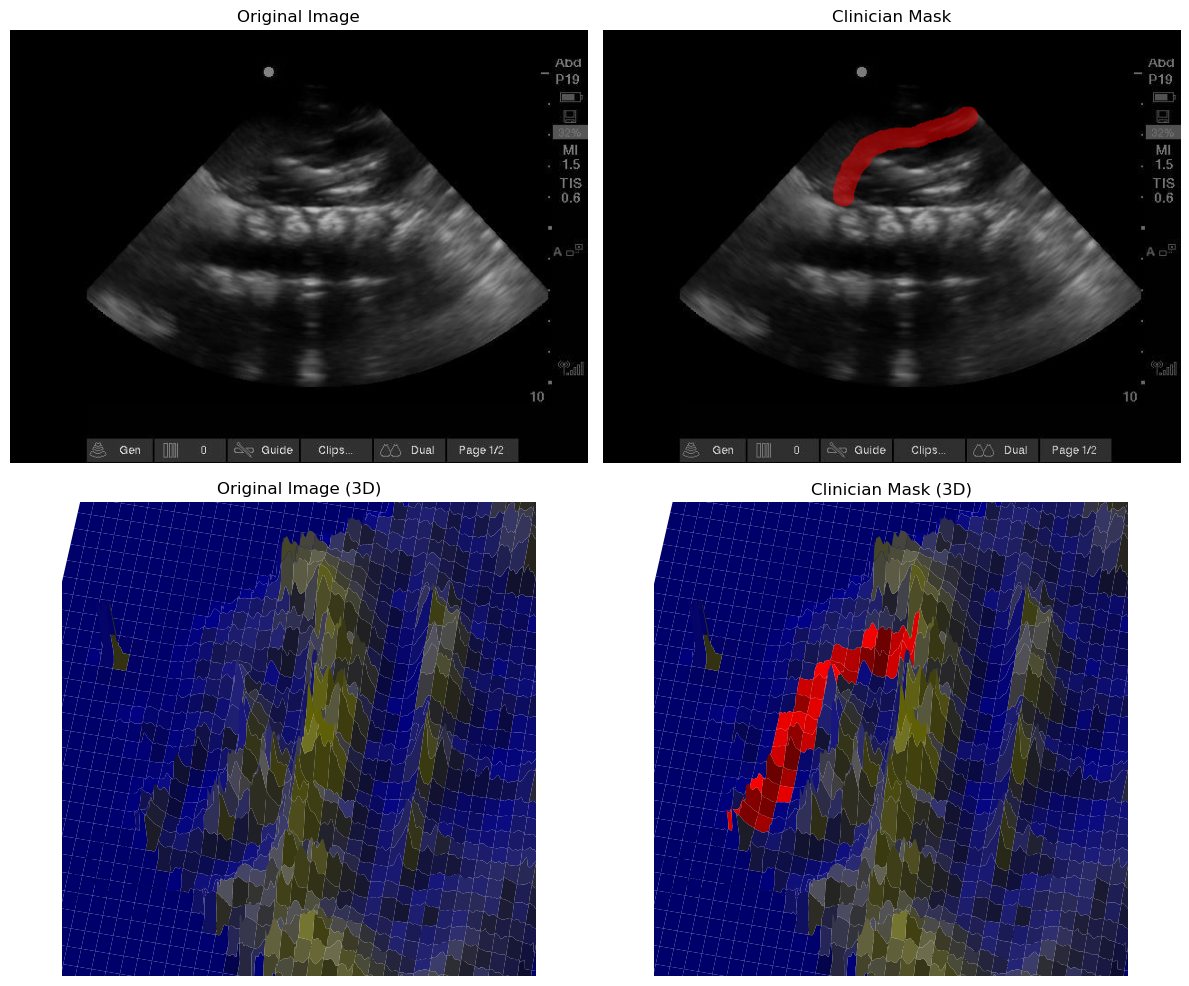

<Figure size 640x480 with 0 Axes>

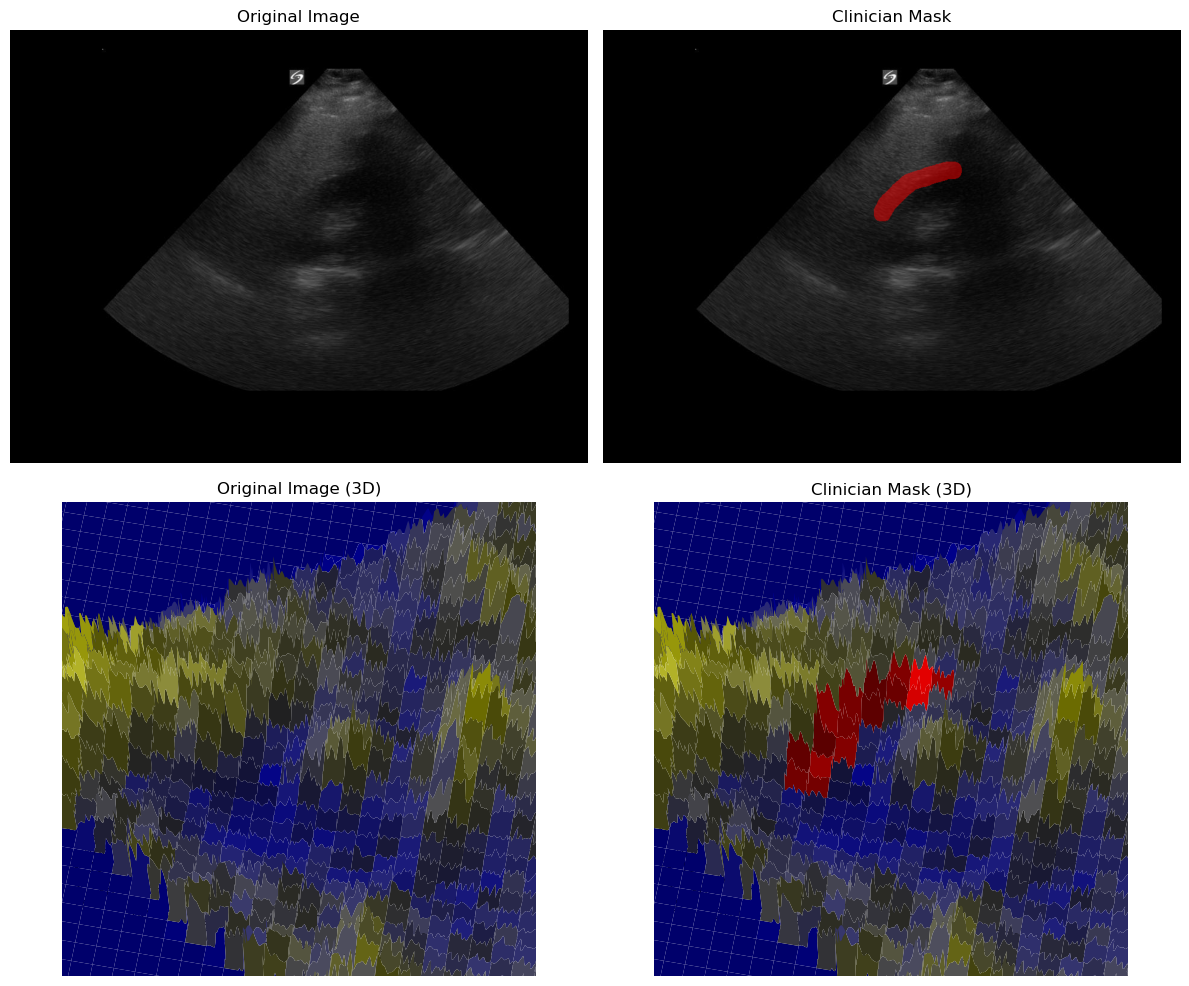

<Figure size 640x480 with 0 Axes>

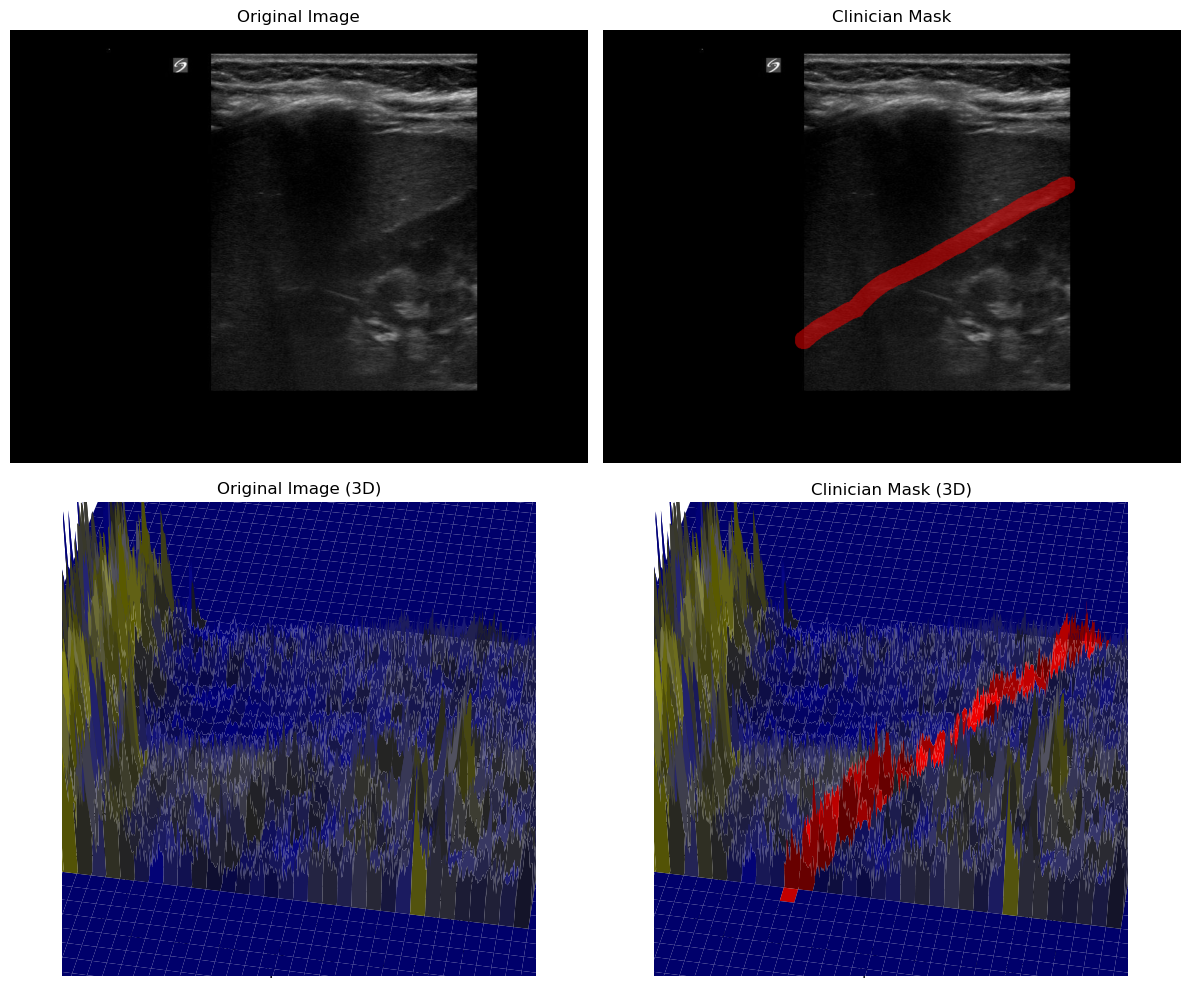

<Figure size 640x480 with 0 Axes>

In [12]:
for idx in range(5):
    settings_3d = [
        [40, 10, 70, 70, 40],
        [10, 10, 10, 10, 10],
        [(325, 475), (450, 650), (250, 450), (400, 700), (500, 800)],
        [(175, 325), (150, 350), (100, 300), (200, 400), (200, 500)]
    ]

    fig = plt.figure(figsize=(12, 10))

    ax1 = fig.add_subplot(221)
    ax1.imshow(np.array(sel_img_array[idx]), cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')

    ax2 = fig.add_subplot(222)
    ax2.imshow(add_red_mask(np.array(sel_img_array[idx]), np.array(sel_label_array[idx]), 0.5))
    ax2.set_title('Clinician Mask')
    ax2.axis('off')

    ax3 = fig.add_subplot(223, projection='3d')
    plot_image_3d_with_mask(truncate_and_scale(sel_img_array[idx]), sel_label_array[idx], settings_3d[0][idx], settings_3d[1][idx], xlim=settings_3d[2][idx], ylim=settings_3d[3][idx], zlim=(0, 255), plot_mask=False, ax=ax3)
    ax3.set_title('Original Image (3D)')

    ax4 = fig.add_subplot(224, projection='3d')
    plot_image_3d_with_mask(truncate_and_scale(sel_img_array[idx]), sel_label_array[idx], settings_3d[0][idx], settings_3d[1][idx], xlim=settings_3d[2][idx], ylim=settings_3d[3][idx], zlim=(0, 255), plot_mask=True, ax=ax4)
    ax4.set_title('Clinician Mask (3D)')

    plt.tight_layout()
    plt.savefig(pjoin(fig_dir, f'view_3D_image_{idx}'))
    plt.show()
    plt.clf()